In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def run_3():
    #generate synthetic data
    n = 100
    m = 200 
    mu = 3
    std = 2 
    x_obs_1 = np.random.normal(loc=mu,scale=std,size=(n)) # x
    x_obs_2 = np.random.normal(loc=mu,scale=std,size=(m))  # y

    #we want to the following hypothesis
    #H_0: TBC (mu_x)=TBC mu_y vs TBC (mu_x) !=TBC mu_y
    # TBC:  Trung binh cong 
    
    # Test statistic
    # T_obs = TBC (mu_x) - TBC (mu_y)
    # T ~ N(TBC (x) - TBC (x), 1/n^2 (Tong i-> n sigma ^ 2 ) + 1/n^2 (Tong i-> m sigma ^ 2 ))
    T_obs = np.mean(x_obs_1) - np.mean(x_obs_2)
    
    # Scale = cang (1/100 ^ 2 * (2*100) + 1/ 200^2 * (2 * 200) ) = căn (0.03)
    
    scale =  np.sqrt(0.03) 
    # Số 2 là variance còn scale phải lấy std = Căn bậc 2. 

    #compute p-value
    cdf = norm.cdf(T_obs, loc=0, scale=scale)
    p_value = 2 * min(cdf, 1 - cdf)

    return p_value

Count:  1645
FPR:  0.1645


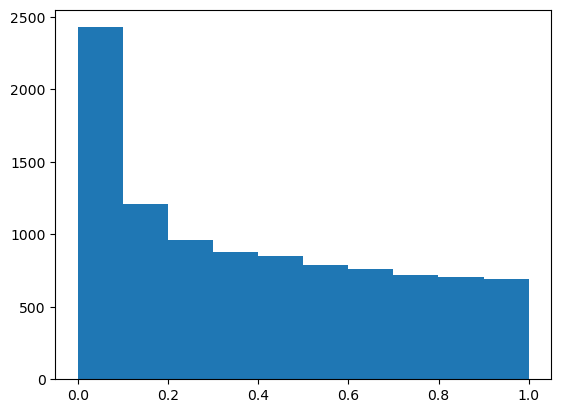

In [3]:
def test3():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run_3()
    list_p_value.append(p_value)
    # print(p_value)
    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test3()